In [39]:
import os
import io
import glob
import hashlib
import pandas as pd
import xml.etree.ElementTree as ET
import tensorflow as tf
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import sys
sys.path.insert(0, "./lib/")
import dataset_util

%matplotlib inline

In [3]:
def class_text_to_int(row_label):
        
    switcher = {
        
        "person": 1,
        "bird": 2,
        "cat": 3,
        "cow": 4,
        "dog": 5,
        "horse": 6,
        "sheep": 7,
        "aeroplane": 8,
        "bicycle": 9,
        "boat": 10,
        "bus": 11,
        "car": 12,
        "motorbike": 13,
        "train": 14,
        "bottle": 15,
        "diningtable": 16,
        "pottedplant": 17,
        "sofa": 18,
        "tvmonitor": 19
        
    }
        
    if row_label in switcher.keys():
        return switcher.get(row_label)
    else:
        raise ValueError('The class is not defined: {0}'.format(row_label))

In [4]:
def load_image(addr):
    
    img = np.array(Image.open(addr))    
    return img.tostring()

def int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def int64_list_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=value))


def bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))


def bytes_list_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=value))


def float_list_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))


In [75]:
def create_example(xml_file):

    #tree = ET.parse("../VOC2012/Annotations/2007_000032.xml")
    tree = ET.parse(xml_file)

    root = tree.getroot()

    image_name = root.find('filename').text
    file_name = image_name.encode('utf8')
    size=root.find('size')
    width = int(size[0].text)
    height = int(size[1].text)

    xmin = []
    ymin = []
    xmax = []
    ymax = []
    classes = []
    classes_text = []
    truncated = []
    poses = []
    difficult_obj = []

    for member in root.findall('object'):

        classes_text.append(member.find("name").text)

        boundBox = member.find("bndbox")
        xmin.append(float(boundBox[0].text))
        ymin.append(float(boundBox[1].text))
        xmax.append(float(boundBox[2].text))
        ymax.append(float(boundBox[3].text))

        difficult_obj.append(0)

        classes.append(class_text_to_int(member.find("name").text)) 

        truncated.append(int(member.find("truncated").text))

        poses.append(member.find("pose").text)

    full_path = os.path.join('../VOC2012/JPEGImages', '{}'.format(image_name))  #provide the path of images directory
    img = load_image(full_path)


    example = tf.train.Example(features=tf.train.Features(feature={
            'image_height': int64_feature(height),
            'image_width': int64_feature(width),
            'image_filename': bytes_feature(file_name),
            'image': bytes_list_feature(img),
            'xmin': float_list_feature(xmin),
            'xmax': float_list_feature(xmax),
            'ymin': float_list_feature(ymin),
            'ymax': float_list_feature(ymax),
            'classes': bytes_list_feature(classes_text),
            'label': int64_list_feature(classes),
            'difficult': int64_list_feature(difficult_obj),
            'truncated': int64_list_feature(truncated),
            'view': bytes_list_feature(poses),
            }))
    
    return example
    #writer = tf.python_io.TFRecordWriter("../Tfdata/mytest.record")
    #writer.write(example.SerializeToString())
    #writer.close()


/home/mohammad/Tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


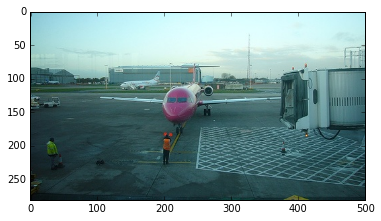

In [94]:
reconstructed_images = []

record_iterator = tf.python_io.tf_record_iterator(path="../Tfdata/mytest.record")

for string_record in record_iterator:
    
    example = tf.train.Example()
        
    example.ParseFromString(string_record)
            
    height = (example.features.feature['image_height'].int64_list.value)
    
    width = (example.features.feature['image_width'].int64_list.value)
    
    image_filename = (example.features.feature['image_filename'].bytes_list.value)
    
    xmin = (example.features.feature['xmin'].float_list.value)
    
    xmax = (example.features.feature['xmax'].float_list.value)
    
    ymin = (example.features.feature['ymin'].float_list.value)

    ymax = (example.features.feature['ymax'].float_list.value)
    
    classes = (example.features.feature['classes'].bytes_list.value)
    
    labels = (example.features.feature['label'].int64_list.value)
    
    difficult = (example.features.feature['difficult'].int64_list.value)
    
    truncated = (example.features.feature['truncated'].int64_list.value)

    view = (example.features.feature['view'].bytes_list.value)
        
    img = (example.features.feature['image'].bytes_list.value)
        
    img_1d = np.fromstring(''.join(img), dtype=np.uint8)
    reconstructed_img = img_1d.reshape((height[0], width[0], 3))
        
    plt.imshow(reconstructed_img,cmap='gray')
    plt.show()
    

http://warmspringwinds.github.io/tensorflow/tf-slim/2016/12/21/tfrecords-guide/